<a href="https://colab.research.google.com/github/sfayhim/Projet_Safe_Driving/blob/main/Safe_Driving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture --no-display
!pip install ultralytics
!pip install split-folders
!pip install -U ipywidgets

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c state-farm-distracted-driver-detection
!unzip state-farm-distracted-driver-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56636.jpg  
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  infla

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import splitfolders
from IPython.display import display, Image
import pandas as pd

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO('yolov8n-cls.pt')

100%|██████████| 5.31M/5.31M [00:00<00:00, 231MB/s]


In [6]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Step 1: Copy files to the Colab workspace
shutil.copy("/content/drive/My Drive/YOLO_DATA/best_safeDriving.pt", "/content/best.pt")

Mounted at /content/drive


'/content/best.pt'

In [7]:
model = YOLO('/content/best.pt')

In [5]:
splitfolders.ratio("/content/imgs/train", output="output", seed=1337, ratio=(0.7, 0.15, 0.15))

Copying files: 22424 files [00:13, 1679.40 files/s]


In [12]:
results = model.train(data = '/content/output', epochs = 10)

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/output, epochs=10, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

train: Scanning /content/output/train... 15692 images, 0 corrupt: 100%|██████████| 15692/15692 [00:05<00:00, 2764.17it/s]


train: New cache created: /content/output/train.cache


val: Scanning /content/output/val... 3358 images, 0 corrupt: 100%|██████████| 3358/3358 [00:01<00:00, 2696.60it/s]

val: New cache created: /content/output/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train2
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10         0G      2.177         16        224:   0%|          | 1/981 [00:01<24:10,  1.48s/it]


100%|██████████| 755k/755k [00:00<00:00, 70.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [01:28<00:00,  1.19it/s]

                   all      0.923      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [01:28<00:00,  1.19it/s]

                   all      0.974      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [01:27<00:00,  1.20it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [01:27<00:00,  1.20it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [01:26<00:00,  1.21it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [01:30<00:00,  1.16it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [01:30<00:00,  1.15it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [01:29<00:00,  1.18it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [01:27<00:00,  1.20it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10         0G    0.07193         12        224: 100%|██████████| 981/981 [16:43<00:00,  1.02s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [01:28<00:00,  1.19it/s]

                   all      0.995          1



10 epochs completed in 3.096 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/output/train... found 15692 images in 10 classes ✅ 
val: /content/output/val... found 3358 images in 10 classes ✅ 
test: /content/output/test... found 3374 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 105/105 [01:19<00:00,  1.31it/s]


                   all      0.995          1
Speed: 0.0ms preprocess, 15.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


In [8]:
model.val()

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/output/train... found 15692 images in 10 classes ✅ 
val: /content/output/val... found 3358 images in 10 classes ✅ 
test: /content/output/test... found 3374 images in 10 classes ✅ 


val: Scanning /content/output/val... 3358 images, 0 corrupt: 100%|██████████| 3358/3358 [00:01<00:00, 3065.21it/s]


val: New cache created: /content/output/val.cache


               classes   top1_acc   top5_acc:   3%|▎         | 6/210 [00:02<01:04,  3.17it/s]

               classes   top1_acc   top5_acc:   4%|▍         | 9/210 [00:03<01:01,  3.29it/s]
  0%|          | 0.00/755k [00:00<?, ?B/s]
100%|██████████| 755k/755k [00:00<00:00, 3.75MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 210/210 [01:06<00:00,  3.15it/s]


                   all      0.995          1
Speed: 0.0ms preprocess, 12.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c8f73486680>
curves: []
curves_results: []
fitness: 0.9974687397480011
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9949374794960022, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9974687397480011}
save_dir: PosixPath('runs/classify/val')
speed: {'preprocess': 0.0012033819229280472, 'inference': 12.681184885685042, 'loss': 0.00015641337991683806, 'postprocess': 0.00026461764273720176}
task: 'classify'
top1: 0.9949374794960022
top5: 1.0

In [9]:
df = pd.read_csv("/content/runs/classify/train2/results.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/classify/train2/results.csv'

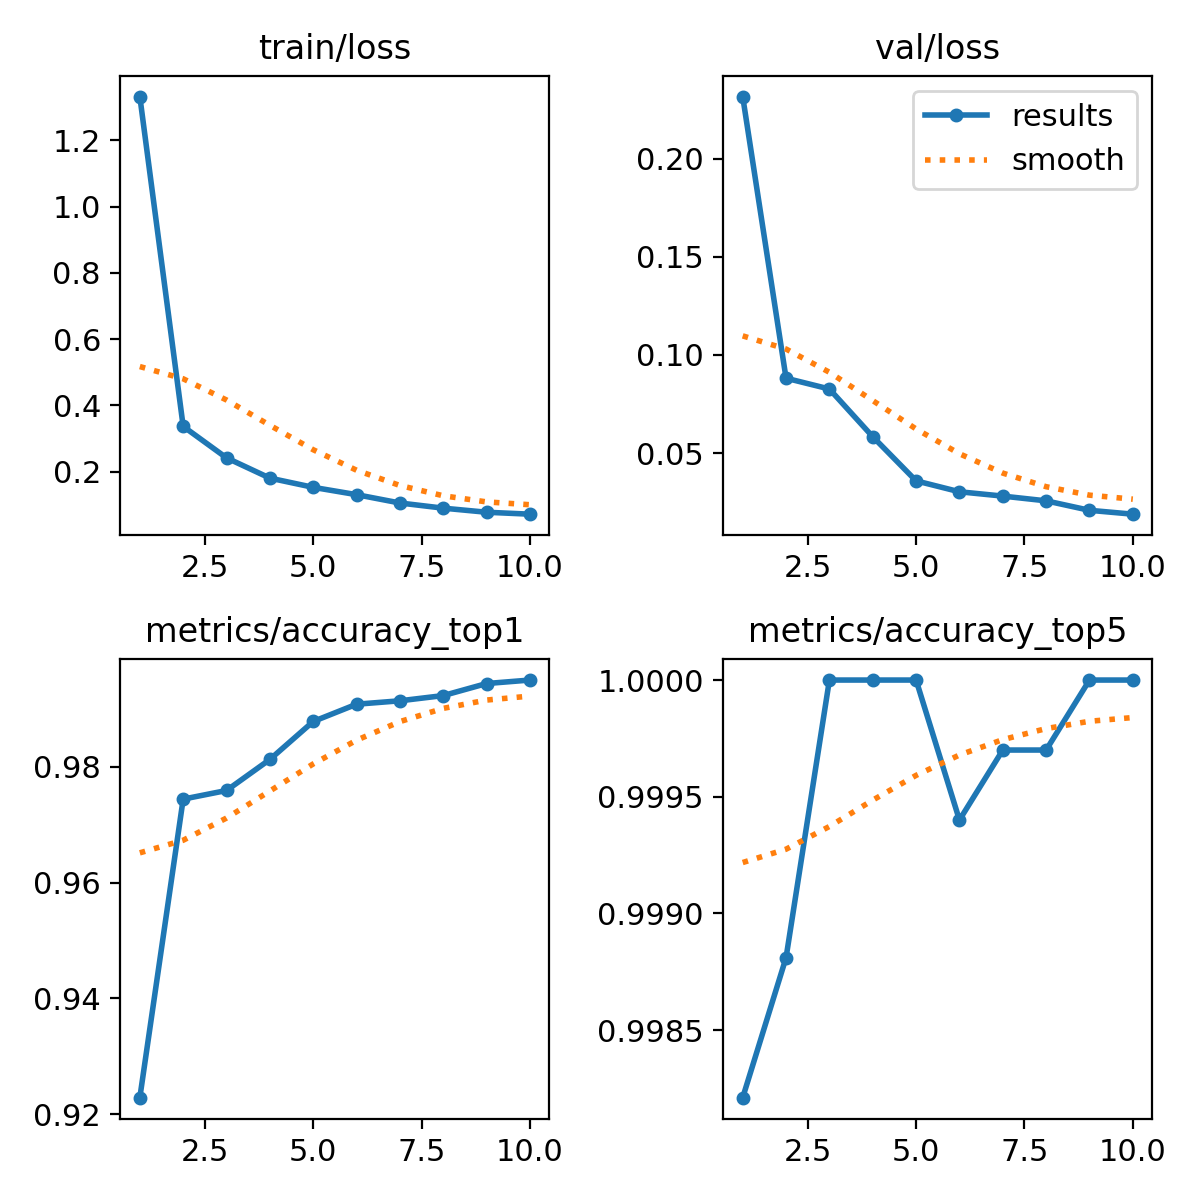

In [17]:
Image("/content/runs/classify/train2/results.png")

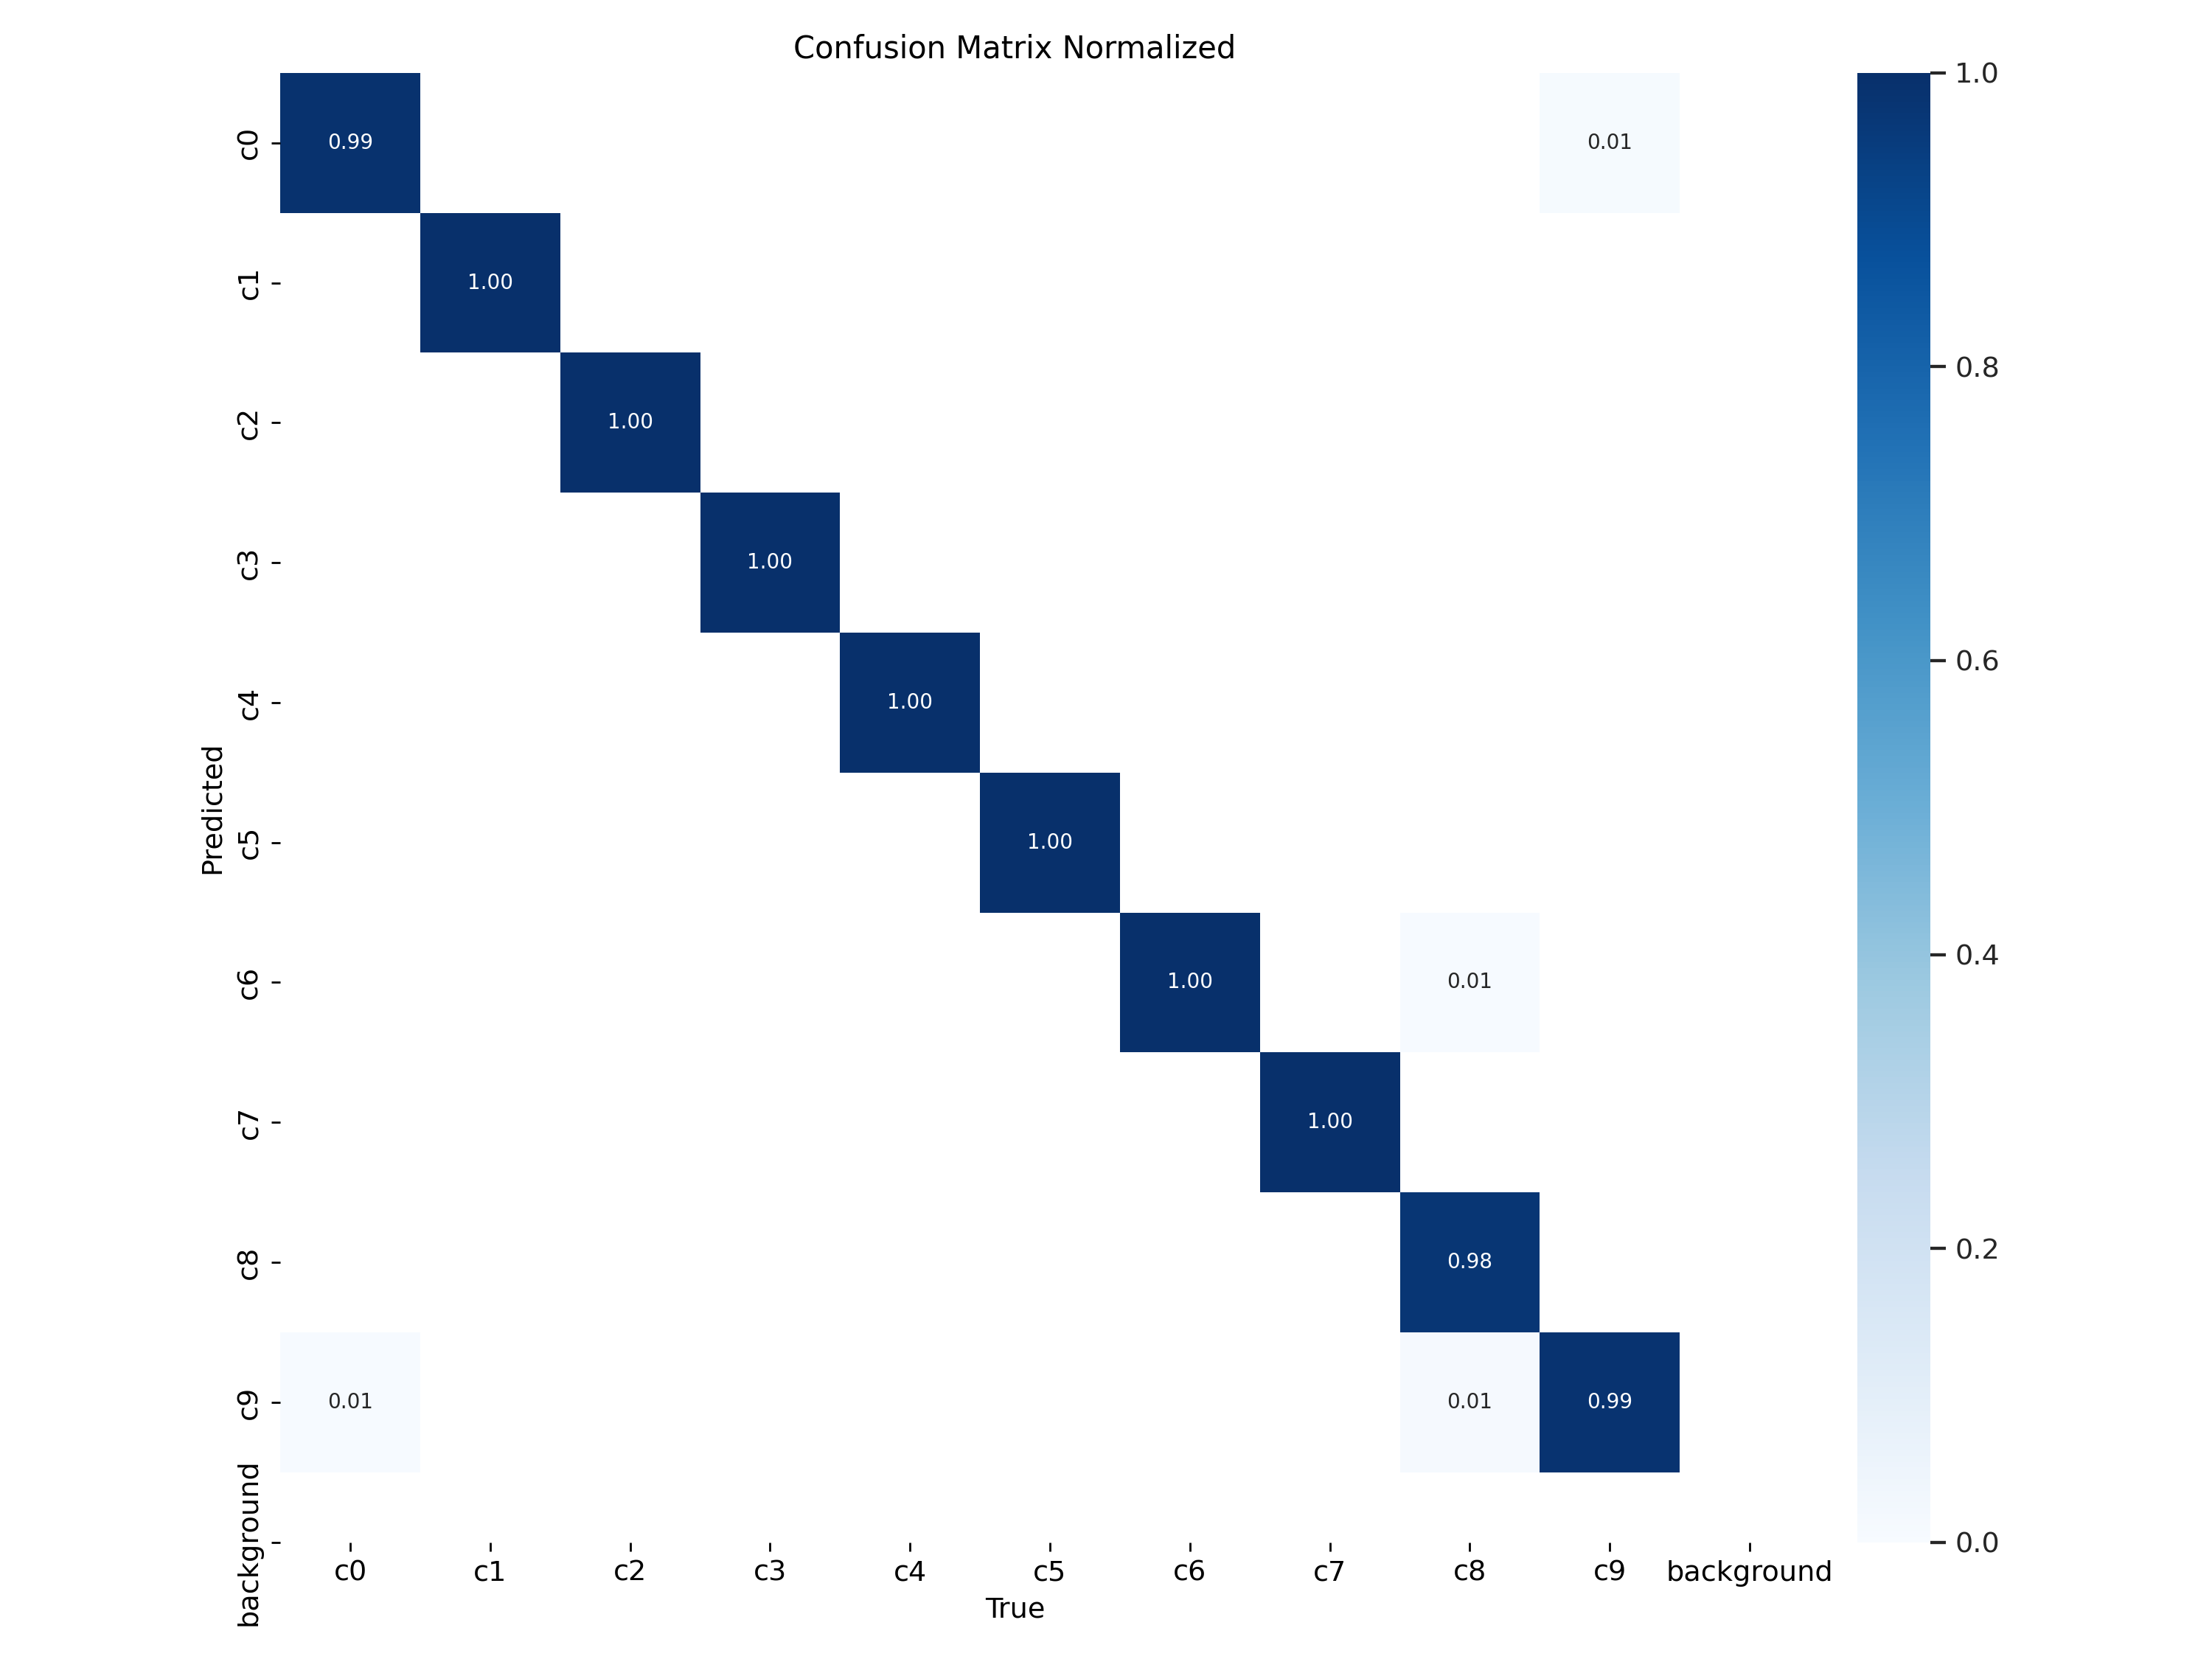

In [18]:
Image("/content/runs/classify/train2/confusion_matrix_normalized.png")

In [10]:
path = "/content/imgs/test/"
model_weights = "/content/best.pt"
pred = [(path+i,model.predict(path+i, model = model_weights)[0].probs.top1) for i in os.listdir(path)[:45]]


image 1/1 /content/imgs/test/img_53105.jpg: 224x224 c1 1.00, c3 0.00, c6 0.00, c4 0.00, c8 0.00, 69.7ms
Speed: 30.5ms preprocess, 69.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/imgs/test/img_60577.jpg: 224x224 c3 0.98, c8 0.01, c4 0.00, c5 0.00, c1 0.00, 36.4ms
Speed: 8.5ms preprocess, 36.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/imgs/test/img_41001.jpg: 224x224 c9 0.47, c0 0.42, c4 0.05, c8 0.04, c6 0.01, 23.6ms
Speed: 20.1ms preprocess, 23.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/imgs/test/img_89923.jpg: 224x224 c3 1.00, c5 0.00, c1 0.00, c4 0.00, c6 0.00, 52.6ms
Speed: 8.8ms preprocess, 52.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/imgs/test/img_34939.jpg: 224x224 c2 1.00, c6 0.00, c8 0.00, c9 0.00, c1 0.00, 44.3ms
Speed: 8.1ms preprocess, 44.3ms inference, 0.1ms postprocess per image at shape (1, 3

In [11]:
labels = {
0: 'safe driving',
1: 'texting - right',
2: 'talking on the phone - right',
3: 'texting - left',
4: 'talking on the phone - left',
5: 'operating the radio',
6: 'drinking',
7: 'reaching behind',
8: 'hair and makeup',
9: 'talking to passenger'
}

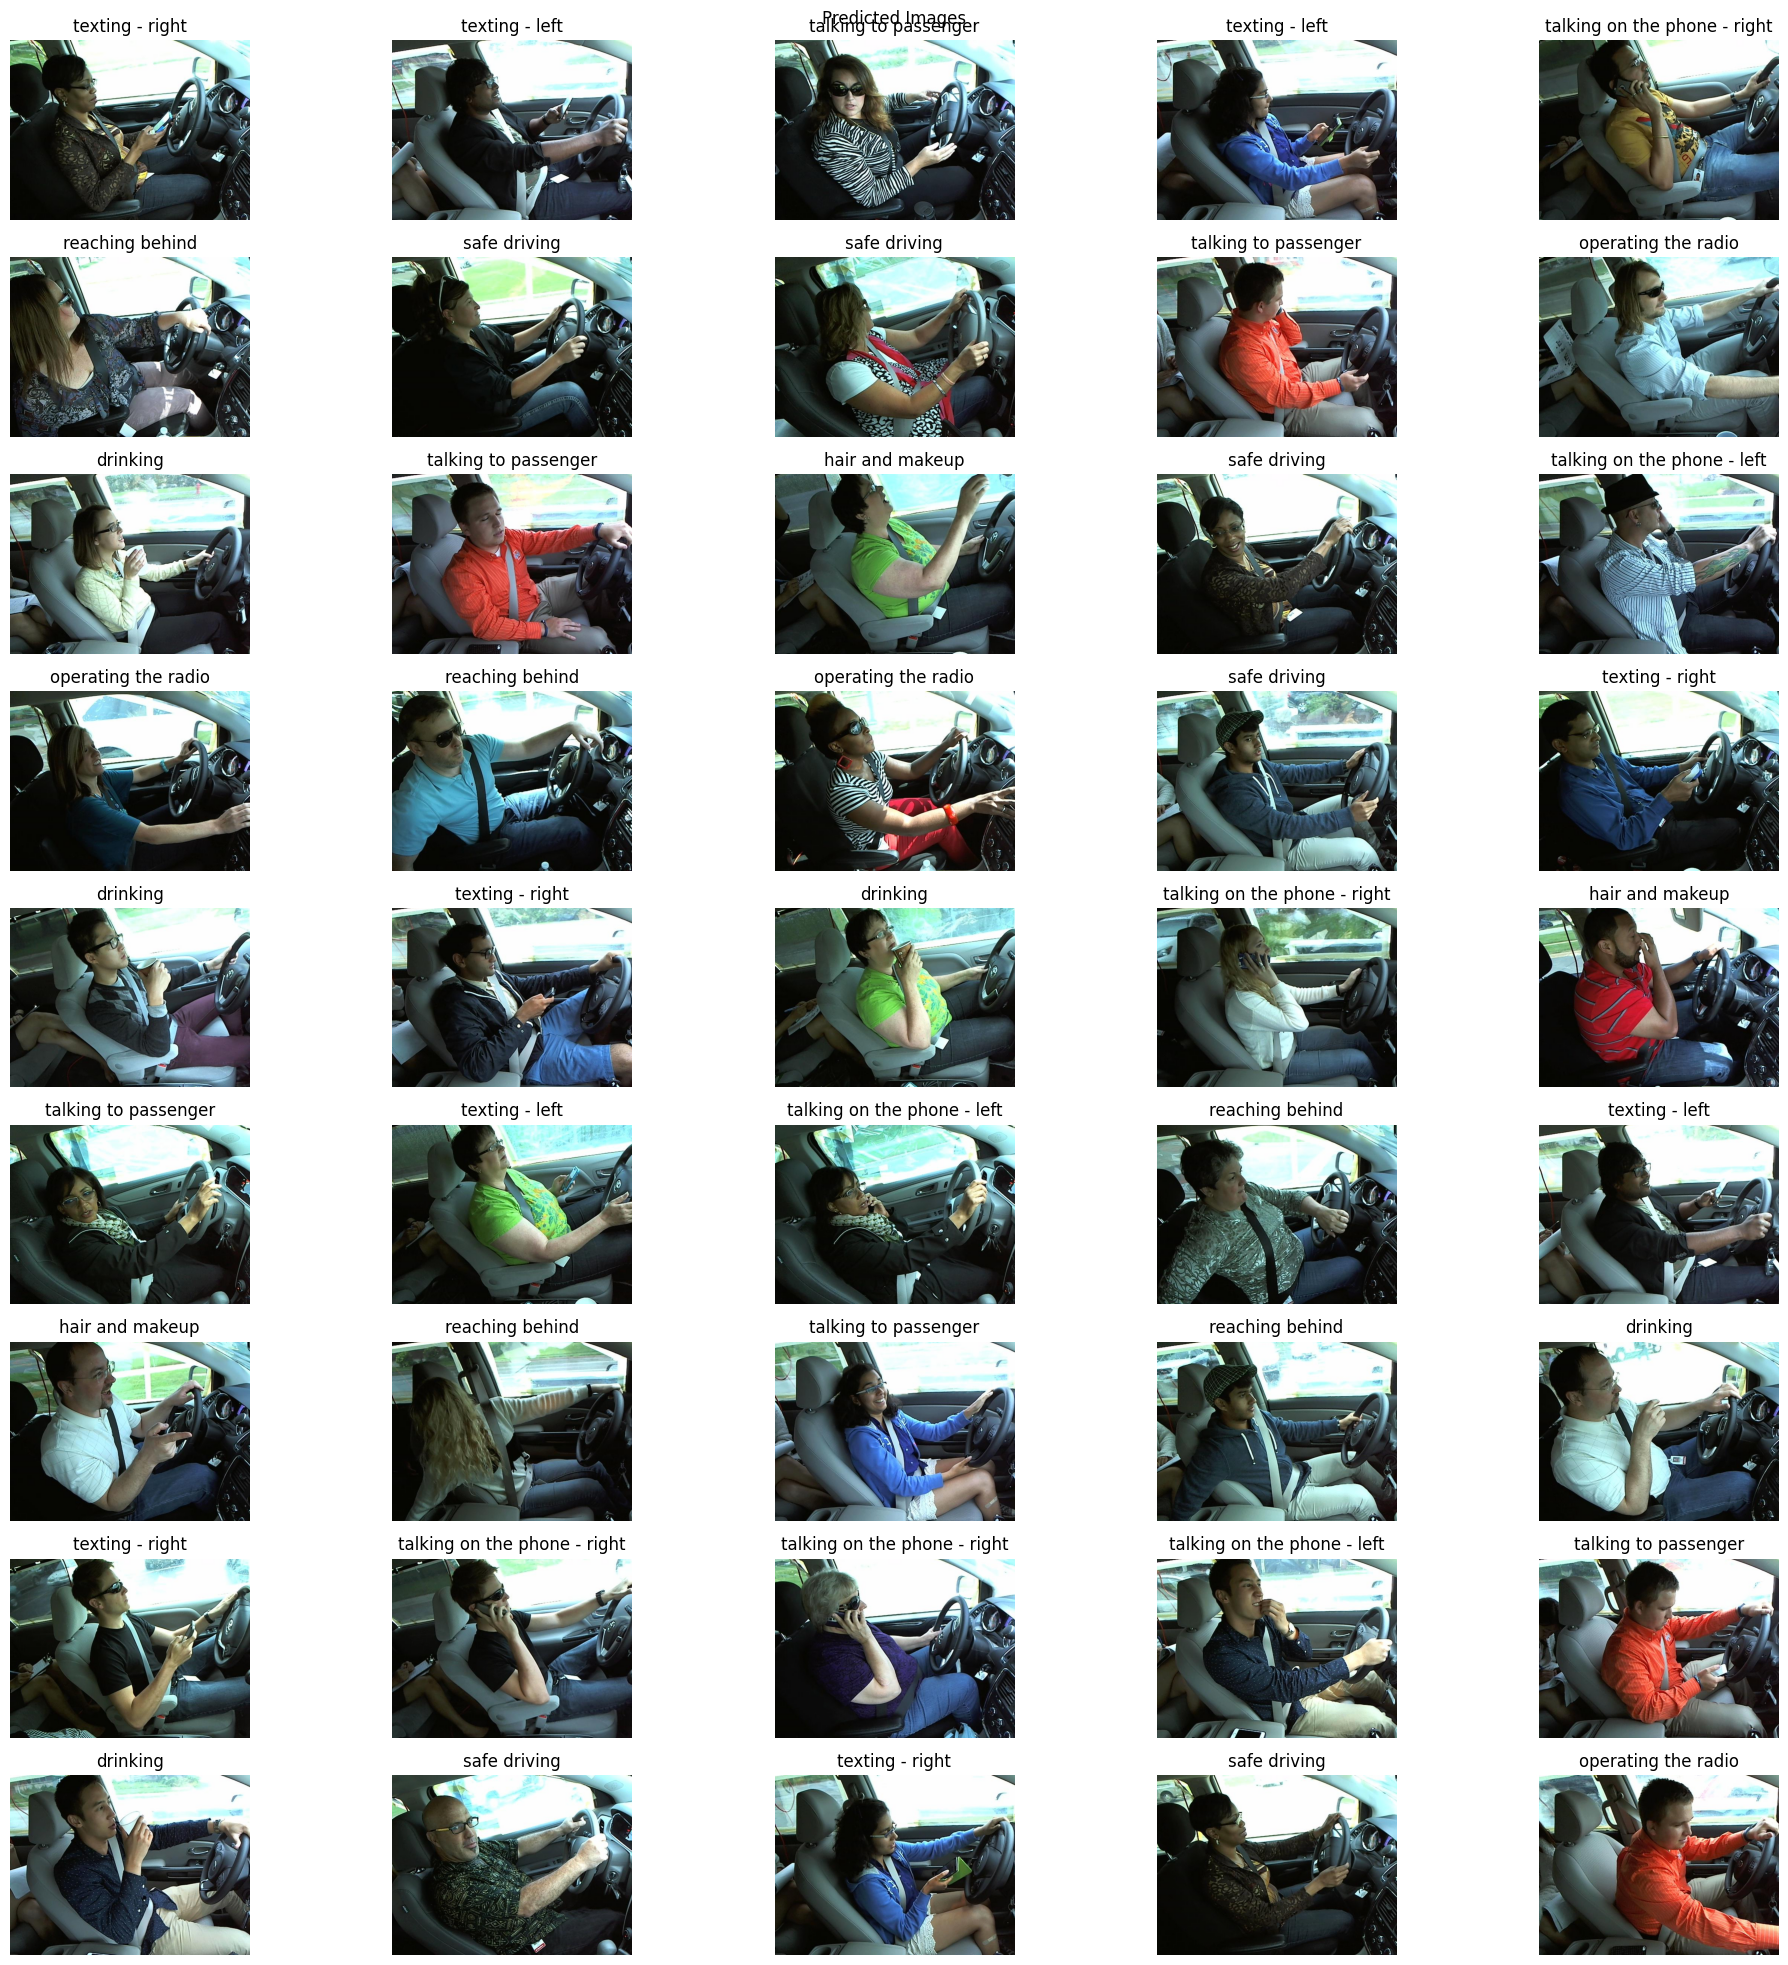

In [12]:
rows = 9
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(20, 20))
for i, (img, label) in enumerate(pred):
    row = i // cols
    col = i % cols
    ax[row, col].imshow(plt.imread(img))
    ax[row, col].set_title(labels.get(label))
    ax[row, col].axis('off')

plt.suptitle("Predicted Images")
plt.tight_layout()
plt.show()

In [53]:
# Prediction
image_path = "/content/drinking.jpg"
model_weights = "/content/runs/classify/train2/weights/best.pt"

#pred1 = [(image_path,model.predict(image_path, model = model_weights)[0].probs.top1)]

for i, (img, label) in enumerate(pred1):
    img_data = plt.imread(str(img))

    # Print the label
    print(labels[label])



reaching behind


In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming 'pred1' contains predictions
image_path = "/content/lol.jpg"
model_weights = "/content/runs/classify/train2/weights/best.pt"
pred1 = [(image_path,model.predict(image_path, model = model_weights)[0].probs.top1)]

# Loop through predictions
for i, (img, label) in enumerate(pred1):
    img_data = mpimg.imread(img)  # Read image data

    # Display image
    plt.imshow(img_data)

    # Print the label (you can also save this as a label to a file if needed)
    print(f"Prediction: {labels[label]}")

    # Add label text to the image (positioned at (10, 10) with some padding)
    plt.text(10, 10, labels[label], color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))

    # Save the modified image
    result_image_path = "/content/persotest/test.jpg"
    plt.savefig(result_image_path)

    # Show image with label
    plt.show()

# Provide the path to download the image
print(f"Modified image saved at: {result_image_path}")



image 1/1 /content/lol.jpg: 224x224 c6 0.35, c4 0.31, c8 0.18, c9 0.12, c3 0.02, 29.9ms
Speed: 8.7ms preprocess, 29.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Prediction: drinking
Modified image saved at: /content/persotest/test.jpg


In [14]:
import cv2
from ultralytics import YOLO

# Label dictionary for predictions
labels = {
    0: 'safe driving',
    1: 'texting - right',
    2: 'talking on the phone - right',
    3: 'texting - left',
    4: 'talking on the phone - left',
    5: 'operating the radio',
    6: 'drinking',
    7: 'reaching behind',
    8: 'hair and makeup',
    9: 'talking to passenger'
}

# Load the YOLOv8 model with your trained weights
model = YOLO("/content/best.pt")  # Replace with the path to your best weights file

def process_video(video_path, output_path):
    # Open the video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Video parameters
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Output video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    frame_count = 0  # To track processed frames

    # Process each frame
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # End of video

        # Run YOLOv8 prediction on the current frame
        results = model(frame)
        class_id = int(results[0].probs.top1)  # Get the top predicted class ID

        # Add label text to the frame
        label = labels.get(class_id, "Unknown")
        cv2.putText(frame, label, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Write the frame into the output video
        out.write(frame)

        frame_count += 1
        print(f"Processed frame: {frame_count}")

    # Release resources
    cap.release()
    out.release()
    print("Video processing complete. Output saved at:", output_path)

# Call the function
video_path = "/content/input2.mp4"  # Replace with your video path
output_path = "/content/output2_video.mp4"  # Output file path
process_video(video_path, output_path)



0: 224x224 c7 0.41, c8 0.27, c9 0.26, c4 0.04, c3 0.02, 21.6ms
Speed: 39.9ms preprocess, 21.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Processed frame: 1

0: 224x224 c7 0.46, c8 0.26, c9 0.21, c4 0.04, c3 0.02, 20.7ms
Speed: 56.2ms preprocess, 20.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Processed frame: 2

0: 224x224 c7 0.46, c9 0.23, c8 0.23, c4 0.04, c3 0.02, 23.6ms
Speed: 49.2ms preprocess, 23.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Processed frame: 3

0: 224x224 c7 0.47, c9 0.25, c8 0.22, c4 0.03, c3 0.02, 22.8ms
Speed: 55.3ms preprocess, 22.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Processed frame: 4

0: 224x224 c7 0.51, c8 0.22, c9 0.21, c4 0.03, c3 0.02, 31.3ms
Speed: 31.1ms preprocess, 31.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Processed frame: 5

0: 224x224 c7 0.49, c8 0.24, c9 0.21, c4 0.03, c3 0.02, 25.2ms
Speed: 53.0ms preprocess, 25.2m